# We have performed the following in the notebook
### 1. Exploring the distribution of ratings of the reviews with the help of count plot
### 2. Sentiment Score calculation using VADER model
### 3. Visualizing the average sentiment score of vader in each rating category using bar plot
### 4. Sentiment Score calculation using Transformers Roberta model
### 5. Visualizing the average sentiment score of roberta in each rating category using bar plot
### 6. Exploring some negative sentiments in very high rated reviews (in order to explore where model failed to identify the sentiments)
### 7. Exploring some positive sentiments in very low rated reviews ((in order to explore where model failed to identify the sentiments)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [12]:
# Read data
df = pd.read_csv('Reviews_B0026RQTGE.csv', index_col='Id', usecols = lambda col : col != 'Unnamed: 0' )

<IPython.core.display.Javascript object>

In [13]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
74632,B0026RQTGE,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
74633,B0026RQTGE,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
74634,B0026RQTGE,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
74635,B0026RQTGE,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
74636,B0026RQTGE,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...


In [4]:
df.shape

(632, 11)

In [14]:
#Reading some reviews
df.iloc[0:3, 8].to_list()

['my 12 year old sheltie has chronic brochotitis, been on meds for three years, these help with the coughing fits at night. so I like them!!!<br /> one bite and both my dogs are addicted!!! be warned!!! 7 pm both shelties are on my lap howling for the drug fix! I am a dog trainer and have never seen  anything like it....<br /><br />three weeks later,, the beloved sheltie got a bowel blockage from these, use with caution.<br />if the cat gets too many she has the runs....<br />sheltie did better when i upped her thryoid meds, and gave her doggie asthma meds.<br />so it worked better for the 18 year old cat, who also has asthma.',
 'These are genuine Greenies product, not a knockoff.  My dogs love them!  It is their favorite treat.  I have 2 small dogs, both under 10 lbs. and the Teenie size is perfect for them.  I paid $22.37 for this 96-pack and it is by far the best price I have found anywhere.  I wish these were part of the Subscribe & Save program.',
 "Our dogs love Greenies, but of

# From reading the reviews, it looks like the product is a pet edible product.

<Axes: xlabel='Score', ylabel='count'>

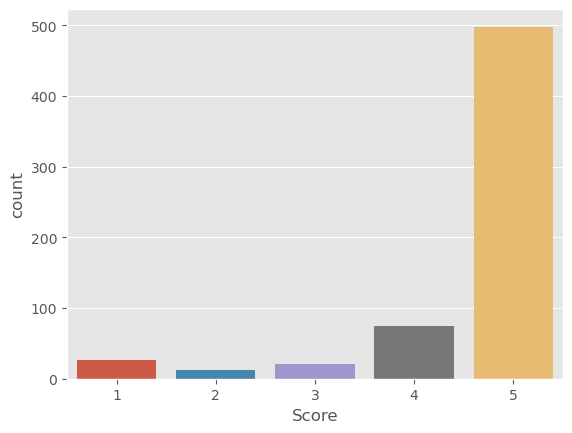

In [17]:
#Lets see the distribution of review scores for this product
sns.countplot(x='Score', data=df)

In [18]:
#Getting Average score of the product
avg_product_score = df['Score'].mean()
avg_product_score

4.5886075949367084

# VADER Approach

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [21]:
#Downloading the vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\harshit\AppData\Roaming\nltk_data...


True

In [22]:
#Initializing SIA. A vader method based sentiment analyzer tool.
sia = SentimentIntensityAnalyzer()

In [23]:
# Testing the polarity score
sia.polarity_scores('I was first in that race, hence won the gold medal')

{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.7783}

In [24]:
#Applying the polarity score on our reviews
vaders_result = df['Text'].apply(lambda x:sia.polarity_scores(x)) 


In [25]:
vader_senti_scores = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    
    #doing sentiment prediction using vader
    vader_result = sia.polarity_scores(text)
    vader_scores = {}
    for key, value in vader_result.items():
        vader_scores[f'vader_{key}'] = value
    
    vader_senti_scores[i] = vader_scores
    
    

  0%|          | 0/632 [00:00<?, ?it/s]

In [26]:
vader_senti_scores = pd.DataFrame(vader_senti_scores)
vader_senti_scores = vader_senti_scores.T
vader_senti_scores

<IPython.core.display.Javascript object>

,vader_neg,vader_neu,vader_pos,vader_compound
74632,0.017,0.828,0.155,0.9542
74633,0.000,0.671,0.329,0.9750
74634,0.000,0.575,0.425,0.9692
74635,0.000,0.840,0.160,0.6369
74636,0.000,0.901,0.099,0.4754
...,...,...,...,...
75259,0.050,0.587,0.363,0.9760
75260,0.000,0.713,0.287,0.9624
75261,0.000,0.585,0.415,0.9618
75262,0.034,0.765,0.201,0.9186


In [27]:
vader_senti_scores = pd.concat([df[['Summary', 'Text', 'Score']], vader_senti_scores], axis=1)
vader_senti_scores.head()

<IPython.core.display.Javascript object>

,Summary,Text,Score,vader_neg,vader_neu,vader_pos,vader_compound
74632,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,5,0.017,0.828,0.155,0.9542
74633,genuine Greenies best price,"These are genuine Greenies product, not a knoc...",5,0.000,0.671,0.329,0.9750
74634,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d...",5,0.000,0.575,0.425,0.9692
74635,dogs love greenies,"What can I say, dogs love greenies. They begg ...",5,0.000,0.840,0.160,0.6369
74636,Greenies review,This review is for a box of Greenies Lite for ...,5,0.000,0.901,0.099,0.4754


# Roberta Pretrained Model

In [30]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [31]:
#Fetching the model and its tokenizer. It will download the model from hugging face 
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

D:\Program Files\Anaconda\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
D:\Program Files\Anaconda\Lib\site-packages\transformers\modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_glob

In [34]:
#saving the model in a directory for using it later without the need for downloading
model_directory = r'../Model_and_Tokenizer/cardiffnlp/twitter-roberta-base-sentiment'
model.save_pretrained(model_directory)
tokenizer.save_pretrained(model_directory)

('../Model_and_Tokenizer/cardiffnlp/twitter-roberta-base-sentiment\\tokenizer_config.json',
 '../Model_and_Tokenizer/cardiffnlp/twitter-roberta-base-sentiment\\special_tokens_map.json',
 '../Model_and_Tokenizer/cardiffnlp/twitter-roberta-base-sentiment\\vocab.json',
 '../Model_and_Tokenizer/cardiffnlp/twitter-roberta-base-sentiment\\merges.txt',
 '../Model_and_Tokenizer/cardiffnlp/twitter-roberta-base-sentiment\\added_tokens.json',
 '../Model_and_Tokenizer/cardiffnlp/twitter-roberta-base-sentiment\\tokenizer.json')

# Testing the Roberta model

In [32]:
example = 'The movie was best of its kind '
tokenized_data = tokenizer(example, return_tensors='pt')

In [33]:
tokenized_data

{'input_ids': tensor([[   0,  133, 1569,   21,  275,    9,   63,  761, 1437,    2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [35]:
results = model(**tokenized_data)
results

SequenceClassifierOutput(loss=None, logits=tensor([[-2.6524, -0.1715,  3.4681]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [36]:
sentiment_scores_roberta = results[0][0].detach().numpy()
sentiment_scores_roberta = softmax(sentiment_scores_roberta)
sentiment_scores_roberta

array([0.00213645, 0.02553419, 0.9723293 ], dtype=float32)

In [37]:
# Define function to give out sentiment scores of roberta model
def get_roberta_scores(text):
    token_ids = tokenizer(text, return_tensors='pt')
    roberta_scores = model(**token_ids)
    roberta_scores = roberta_scores[0][0].detach()
    roberta_scores = softmax(roberta_scores)
    roberta_scores_dict = {
        'roberta_negative': roberta_scores[0],
        'roberta_neutral': roberta_scores[1],
        'roberta_positive': roberta_scores[2]

    }
    return roberta_scores_dict

In [38]:
#Testing the above function
print(get_roberta_scores(example))

{'roberta_negative': 0.002136452, 'roberta_neutral': 0.025534194, 'roberta_positive': 0.9723293}


In [39]:
#Performing the sentiment analysis using bothe Vader and Roberta model on out dataset
vader_roberta_senti_scores = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    try :
        text = row['Text']

        #doing sentiment prediction using vader
        vader_result = sia.polarity_scores(text)
        vader_scores = {}
        for key, value in vader_result.items():
            vader_scores[f'vader_{key}'] = value

        #doing sentiment prediction using roberta
        roberta_scores = get_roberta_scores(text)

        vader_roberta_senti_scores[i] = {**vader_scores, **roberta_scores}
    
    except RuntimeError:
            print('Error for id :', i)

  0%|          | 0/632 [00:00<?, ?it/s]

Error for id : 74766


In [40]:
#Creating dataframe for the sentiment score of all the reviews
vader_roberta_senti_scores = pd.DataFrame(vader_roberta_senti_scores)

#The dataframe is created in horizontal alignment, so making it vertical
vader_roberta_senti_scores = vader_roberta_senti_scores.T
vader_roberta_senti_scores.head()

<IPython.core.display.Javascript object>

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive
74632,0.017,0.828,0.155,0.9542,0.034747,0.154147,0.811106
74633,0.000,0.671,0.329,0.9750,0.001693,0.010387,0.987920
74634,0.000,0.575,0.425,0.9692,0.002031,0.009127,0.988842
74635,0.000,0.840,0.160,0.6369,0.014033,0.089241,0.896727
74636,0.000,0.901,0.099,0.4754,0.001545,0.023084,0.975371


<Axes: xlabel='Score', ylabel='vader_compound'>

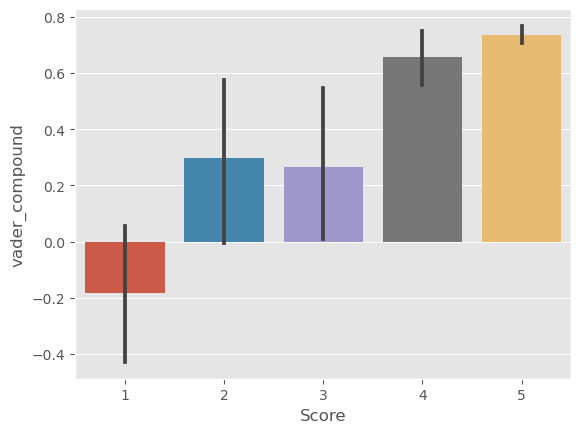

In [41]:
#Concating the sentiment scores with the ratings, and review texts to get all the info side by side
vader_roberta_senti_scores = pd.concat([df[['Score', 'Summary', 'Text']],vader_roberta_senti_scores], axis=1)
vader_roberta_senti_scores.head()

<IPython.core.display.Javascript object>

,Score,Summary,Text,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive
74632,5,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,0.017,0.828,0.155,0.9542,0.034747,0.154147,0.811106
74633,5,genuine Greenies best price,"These are genuine Greenies product, not a knoc...",0.000,0.671,0.329,0.9750,0.001693,0.010387,0.987920
74634,5,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d...",0.000,0.575,0.425,0.9692,0.002031,0.009127,0.988842
74635,5,dogs love greenies,"What can I say, dogs love greenies. They begg ...",0.000,0.840,0.160,0.6369,0.014033,0.089241,0.896727
74636,5,Greenies review,This review is for a box of Greenies Lite for ...,0.000,0.901,0.099,0.4754,0.001545,0.023084,0.975371


In [43]:
#Transfering the dataframe to a new variable name
sentiment_scores = vader_roberta_senti_scores

# Average Vader sentiment score for each rating

<Axes: xlabel='Score', ylabel='vader_compound'>

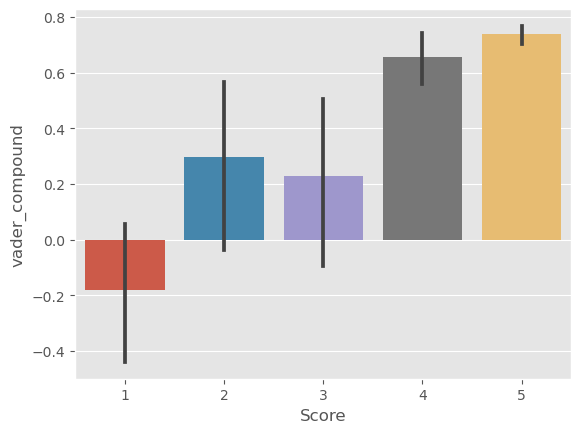

In [68]:
#Plot the average sentiment score for each rating score
sns.barplot(x='Score', y='vader_compound', data=sentiment_scores)


# Average  Roberta Positive sentiment score for each rating


<Axes: xlabel='Score', ylabel='roberta_positive'>

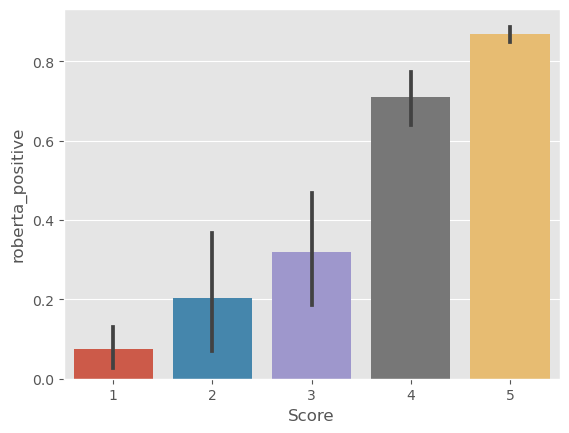

In [67]:
#Plot the average sentiment score for each rating score
sns.barplot(x='Score', y='roberta_positive', data=sentiment_scores)

# Average  Roberta Negative sentiment score for each rating


<Axes: xlabel='Score', ylabel='roberta_negative'>

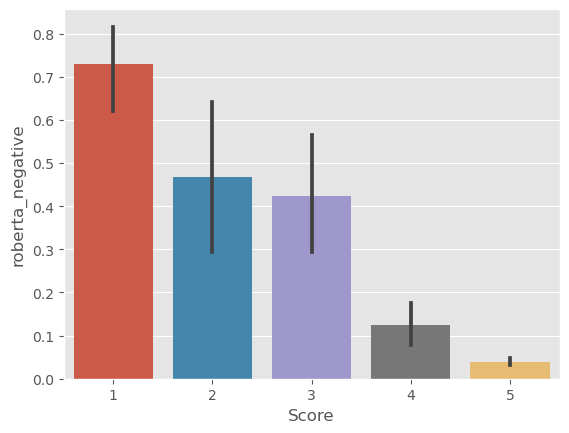

In [69]:
#Plot the average sentiment score for each rating score
sns.barplot(x='Score', y='roberta_negative', data=sentiment_scores)

# Checking the "1-star" review with highest positive sentiment

In [53]:
sentiment_scores[sentiment_scores['Score']==1].sort_values('roberta_positive', ascending=False)

,Score,Summary,Text,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive
74956,1,Greenies Lite - Not for dogs who had the taste...,My little dog who's rather picky about his tre...,0.016,0.856,0.128,0.9534,0.065356,0.243100,0.691545
75195,1,BEWARE,I have bought greenies for my dog for 7 years ...,0.109,0.776,0.115,0.1280,0.274302,0.390759,0.334939
75221,1,"The Ultimate Consumer ""Fraud.""","We have two St. Bernards, one of whom is close...",0.082,0.851,0.067,-0.6371,0.250683,0.463774,0.285542
75191,1,puppy didn't like,Bought the big box to be economical..bad choic...,0.101,0.746,0.153,0.6258,0.498162,0.381671,0.120166
75205,1,96=45,Just because you see 96 treats on the box your...,0.091,0.909,0.000,-0.3400,0.415627,0.507753,0.076620
75189,1,Worm found on Greenies Joint Care,Just opened Greenies Joint Care (individually ...,0.000,0.757,0.243,0.8098,0.551989,0.378599,0.069412
74664,1,Check Contents First,"Half way through the supply, I noticed that th...",0.067,0.885,0.048,-0.0900,0.443764,0.490425,0.065811
75211,1,My dog won't eat them,Bought these for my little shih-tzu a few mont...,0.026,0.974,0.000,-0.1511,0.679034,0.266311,0.054655
75214,1,Find another treat,I have an almost two year old lab mix named Ar...,0.105,0.747,0.148,0.7214,0.728016,0.219393,0.052591
75198,1,Dog wont eat them,Had to buy another box of the same thing at Pe...,0.070,0.930,0.000,-0.2411,0.726518,0.243288,0.030194


In [49]:
#Roberta 
sentiment_scores[sentiment_scores['Score']==1].sort_values('roberta_positive', ascending=False)['Text'].iloc[0]

"My little dog who's rather picky about his treats absolutely loves Greenies REGULAR.  As he's getting older, I thought I'd go for the LITE since I'm sure regular Greenies have a lot higher calories.  So I bought Greenies LITE (teenie, 96 pack) and he sniffed at the first one and literally pushed it away with his nose and several more attempts have gone unsuccessful and I've been just handing them out to my friends' less-picky dogs.  Had to buy a tub of Greenies regular and surely enough, he sniffed at it, did his dance, grabbed it and ran away (well, he was so happy he skipped away) with it.  When I smell it, the regular definitely smells better/more appetizing whereas the LITE has the blah~ smell to it.  So if your dog already had a taste of regular Greenies, I suggest you stick with the regular."

# The review is a negative review but due to the nature of the sentence, the model identified more positive sentiments in it.

In [64]:
sentiment_scores[sentiment_scores['Score']==1].sort_values('vader_compound', ascending=False).head()

,Score,Summary,Text,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive
74956,1,Greenies Lite - Not for dogs who had the taste...,My little dog who's rather picky about his tre...,0.016,0.856,0.128,0.9534,0.065356,0.243100,0.691545
75188,1,These scare me. Look at what I've found online:,I was all set to buy these thinking they'd be ...,0.037,0.862,0.101,0.9378,0.747017,0.225048,0.027935
75189,1,Worm found on Greenies Joint Care,Just opened Greenies Joint Care (individually ...,0.000,0.757,0.243,0.8098,0.551989,0.378599,0.069412
75214,1,Find another treat,I have an almost two year old lab mix named Ar...,0.105,0.747,0.148,0.7214,0.728016,0.219393,0.052591
75191,1,puppy didn't like,Bought the big box to be economical..bad choic...,0.101,0.746,0.153,0.6258,0.498162,0.381671,0.120166


In [54]:
#Vader 
sentiment_scores[sentiment_scores['Score']==1].sort_values('vader_compound', ascending=False)['Text'].iloc[0]

"My little dog who's rather picky about his treats absolutely loves Greenies REGULAR.  As he's getting older, I thought I'd go for the LITE since I'm sure regular Greenies have a lot higher calories.  So I bought Greenies LITE (teenie, 96 pack) and he sniffed at the first one and literally pushed it away with his nose and several more attempts have gone unsuccessful and I've been just handing them out to my friends' less-picky dogs.  Had to buy a tub of Greenies regular and surely enough, he sniffed at it, did his dance, grabbed it and ran away (well, he was so happy he skipped away) with it.  When I smell it, the regular definitely smells better/more appetizing whereas the LITE has the blah~ smell to it.  So if your dog already had a taste of regular Greenies, I suggest you stick with the regular."

# Both the models identified highest positive sentiment in the same 1 star review

# Checking the "5 Star" reviews with highest negative sentiments

In [65]:
#Roberta
sentiment_scores[sentiment_scores['Score']==5].sort_values('roberta_negative', ascending=False).head()

,Score,Summary,Text,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive
74742,5,Great Greenies,My dog no longer needs to have his teeth clean...,0.104,0.896,0.000,-0.2960,0.725353,0.249067,0.025580
74791,5,Greenies are awesome!!,My dogs go crazy for these!! I was worried for...,0.168,0.758,0.074,-0.9210,0.702831,0.246060,0.051109
74831,5,Great price..,Came with the plastic bin! My Lhasa Apso liked...,0.206,0.654,0.140,-0.5255,0.690595,0.257604,0.051802
75156,5,Greenies good product but price has gone up,I have been buying this product for quite some...,0.129,0.786,0.085,-0.2960,0.650625,0.249638,0.099738
74749,5,love it!!!,My dog thinks it is crack! He is crazy over th...,0.090,0.834,0.077,-0.1007,0.644353,0.259558,0.096089


In [63]:
sentiment_scores[sentiment_scores['Score']==5].sort_values('roberta_negative', ascending=False)['Text'].iloc[0]

'My dog no longer needs to have his teeth cleaned by the vet, since he gets one grenie every day.'

# This is originally a very positive review but the model failed to pick its sentiment.

In [61]:
#Vader
sentiment_scores[sentiment_scores['Score']==5].sort_values('vader_compound', ascending=True)

,Score,Summary,Text,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive
74791,5,Greenies are awesome!!,My dogs go crazy for these!! I was worried for...,0.168,0.758,0.074,-0.9210,0.702831,0.246060,0.051109
75037,5,"A little pricey, but worth the $",Our full sized Goldendoodle gets one every day...,0.199,0.801,0.000,-0.8658,0.022575,0.150261,0.827164
74895,5,Greenies are Great !,[[ASIN:B000KBFKIQ Greenies Dental Chews for Do...,0.132,0.828,0.040,-0.8427,0.004094,0.038781,0.957124
74670,5,Best doggie treat,I buy the teenie greenies and break them in ha...,0.132,0.832,0.036,-0.8364,0.068857,0.182854,0.748289
75133,5,Happy Customer,I am not only very happy with this product but...,0.263,0.737,0.000,-0.7528,0.001382,0.008680,0.989938
...,...,...,...,...,...,...,...,...,...,...
74941,5,Great price on a great chew,We give our dog one of these per day to help c...,0.000,0.621,0.379,0.9865,0.002083,0.014915,0.983002
75232,5,Great product and free shipping to AK. Can't ...,I thought I would write a review because I hav...,0.044,0.778,0.178,0.9879,0.031226,0.194129,0.774645
75006,5,Freshens breath and my Yorkie loves 'em!!,"When my Yorkie was about 10 1/2 years old, her...",0.022,0.837,0.142,0.9893,0.025050,0.129733,0.845217
75020,5,My fussy little dog's favorite treat,"I usually buy these at the pet store, but the ...",0.084,0.568,0.348,0.9901,0.011361,0.072687,0.915953


In [62]:
sentiment_scores[sentiment_scores['Score']==5].sort_values('vader_compound', ascending=True)['Text'].iloc[0]

'My dogs go crazy for these!! I was worried for their safety since I had heard some negative reviews for these chews, so I did some research and found that the most common problem is from choking.  They do chomp them down so I have them eat it while I\'m nearby in case they choke (haven\'t yet).  Their teeth and gums are clean and strong so that saves $$ on dental bills.  I don\'t like the idea of having them go under general anesthesia just to get their teeth cleaned (seems much riskier), so I will continue to take the "risk" with Greenies. Amazon price for these, even with shipping costs, are still the lowest. And my dogs get to bark at the FedEx guy!!'